Регрессия – это зависимость среднего значения какой-либо величины
от некоторой другой величины или от нескольких других величин.  

Изучение регрессии основано на том, что случайные величины Х и 𝑌
связаны между собой вероятностной зависимостью: при каждом
конкретном значении 𝑋 = 𝑥 величина 𝑌 является случайной величиной с
вполне определённым распределением вероятностей.

Регрессионный анализ – это раздел математической статистики,
изучающий регрессионную зависимость между случайными величинами по
статистическим данным.

Таким образом, регрессионный анализ – набор статистических
методов исследования влияния одной или нескольких независимых
переменных 𝑋1, … , 𝑋𝑛 на зависимую переменную 𝑌

-----

Теоретический материал – Задачи регрессии

Линейная регрессия - это широко используемый метод статистического анализа, который использует регрессионный анализ в математической статистике для определения количественной взаимосвязи между двумя или более переменным

Атрибуты – это независимые переменные, а метки – это зависимые переменные, значения которых должны быть предсказаны.

Теоретический материал – Множественная регрессия

Линейная регрессия с участием нескольких переменных называется «множественной линейной регрессией» или многомерной линейной регрессией.

можете использовать множественную регрессию, чтобы узнать, какой фактор оказывает наибольшее влияние на прогнозируемый результат или как различные переменные связаны друг с другом

# 1.1.3 — Задание

Представьте собственные данные и постройте экстраполяцию полиномами первой, второй и третьей степени.

Линейная регрессия (Linear regression) – модель зависимости переменной x от одной или нескольких других переменных 

Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует этим точкам.

Функция потерь — метод наименьших квадратов 
Функция потерь – это мера количества ошибок, которые наша линейная регрессия делает на наборе данных. 

Задача экраполяции
Допустим у нас есть много экспериментальных точек. Необходимо через
них провести кривую, которая как можно ближе проходила к этим точкам. При
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).

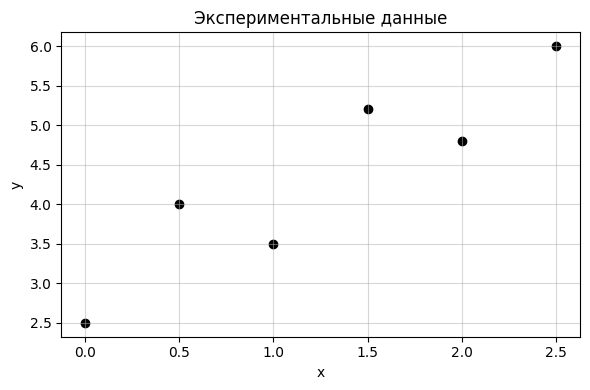

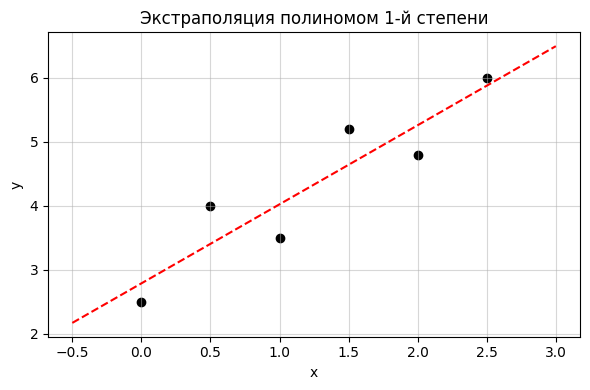

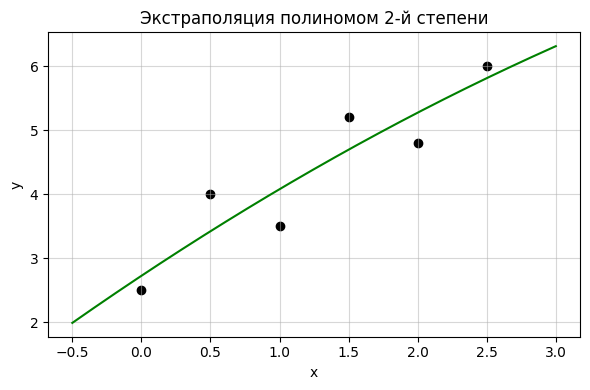

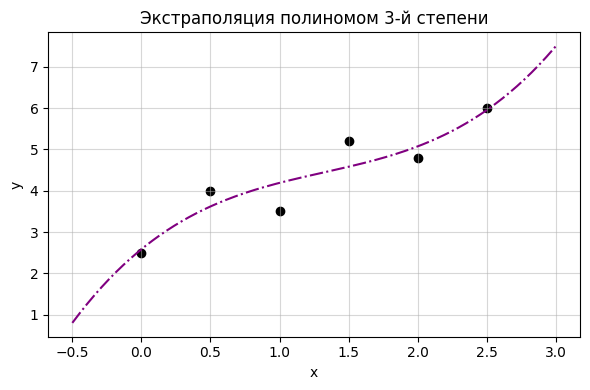

Коэффициенты полинома 1-й степени: [1.23428571 2.79047619]
Коэффициенты полинома 2-й степени: [-0.07857143  1.43071429  2.725     ]
Коэффициенты полинома 3-й степени: [ 0.37777778 -1.4952381   2.72460317  2.58333333]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5])
y = np.array([2.5, 4.0, 3.5, 5.2, 4.8, 6.0])

p1 = np.poly1d(np.polyfit(x, y, 1))
p2 = np.poly1d(np.polyfit(x, y, 2))
p3 = np.poly1d(np.polyfit(x, y, 3))

x_ext = np.linspace(-0.5, 3.0, 200)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='black')
plt.title('Экспериментальные данные')
plt.xlabel('x'); plt.ylabel('y')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

# Полином 1-й степени
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='black', label='Данные')
plt.plot(x_ext, p1(x_ext), '--', color='red')
plt.title('Экстраполяция полиномом 1-й степени')
plt.xlabel('x'); plt.ylabel('y')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

# Полином 2-й степени
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='black', label='Данные')
plt.plot(x_ext, p2(x_ext), '-', color='green')
plt.title('Экстраполяция полиномом 2-й степени')
plt.xlabel('x'); plt.ylabel('y')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

# Полином 3-й степени
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='black', label='Данные')
plt.plot(x_ext, p3(x_ext), '-.', color='purple')
plt.title('Экстраполяция полиномом 3-й степени')
plt.xlabel('x'); plt.ylabel('y')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

# Вывод коэффициентов
print("Коэффициенты полинома 1-й степени:", p1.coefficients)
print("Коэффициенты полинома 2-й степени:", p2.coefficients)
print("Коэффициенты полинома 3-й степени:", p3.coefficients)

# 1.1.5 — Задание

Подставьте собственные данные и поэкспериментируйте с представленными функциями:  
    f(x,b)=b0+b1xf(x,b)=b0​+b1​x  
    f(x,b)=b0+b1x+b2x2f(x,b)=b0​+b1​x+b2​x2  
    f(x,b)=b0+b1ln⁡(x)f(x,b)=b0​+b1​ln(x)  
    f(x,b)=b0⋅xb1f(x,b)=b0​⋅xb1​

Проанализируйте динамику изменения данных.

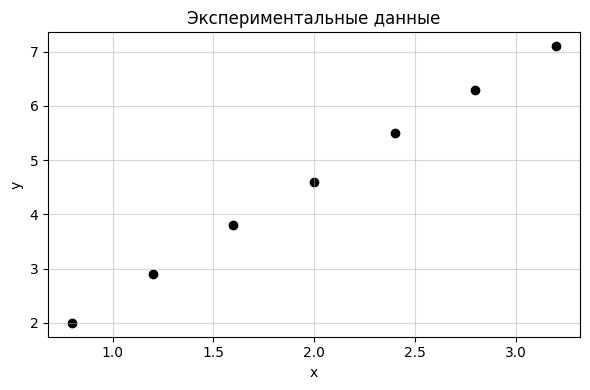

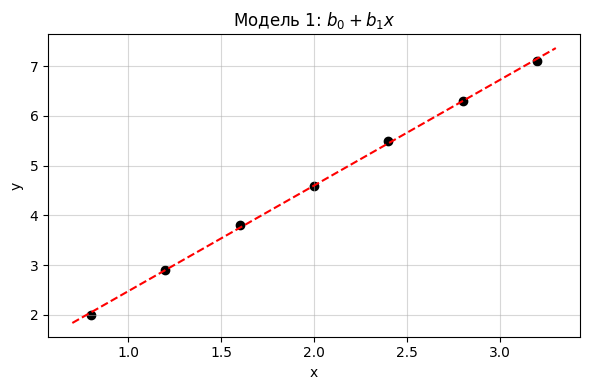

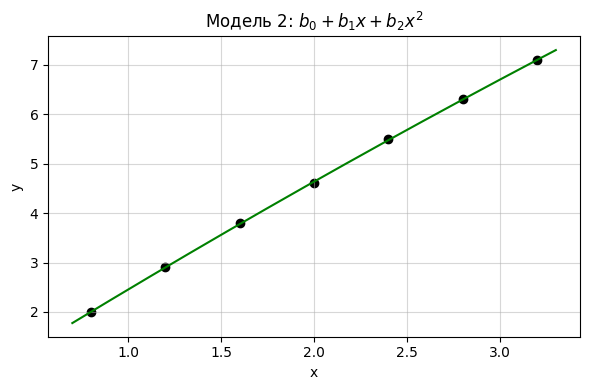

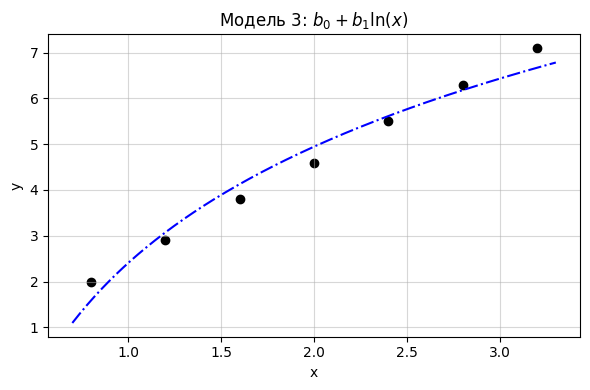

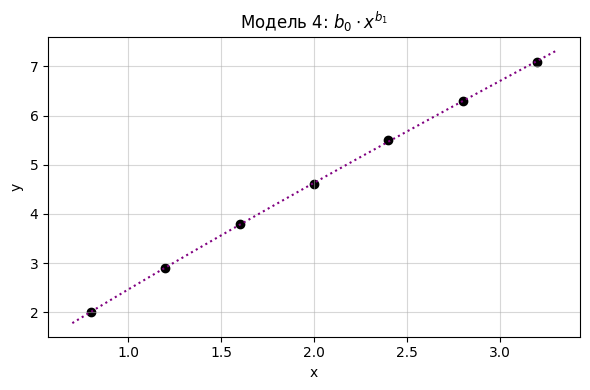

Модель 1: b0 = 0.350, b1 = 2.125
Модель 2: b0 = 0.150, b1 = 2.363, b2 = -0.060
Модель 3: b0 = 2.403, b1 = 3.670
Модель 4: b0 = 2.461, b1 = 0.913


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Собственные данные (x > 0)
x = np.array([0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.2])
y = np.array([2.0, 2.9, 3.8, 4.6, 5.5, 6.3, 7.1])

# Модели
def f1(x, b0, b1): return b0 + b1 * x
def f2(x, b0, b1, b2): return b0 + b1 * x + b2 * x**2
def f3(x, b0, b1): return b0 + b1 * np.log(x)
def f4(x, b0, b1): return b0 * x**b1

# Подгонка
p1, _ = curve_fit(f1, x, y)
p2, _ = curve_fit(f2, x, y)
p3, _ = curve_fit(f3, x, y)
p4, _ = curve_fit(f4, x, y)

x_plot = np.linspace(0.7, 3.3, 200)

# Исходные данные
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='black')
plt.title('Экспериментальные данные')
plt.xlabel('x'); plt.ylabel('y')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

# Модель 1 (линейная)
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='black')
plt.plot(x_plot, f1(x_plot, *p1), '--', color='red')
plt.title('Модель 1: $b_0 + b_1 x$')
plt.xlabel('x'); plt.ylabel('y')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

# Модель 2 (квадратичная)
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='black')
plt.plot(x_plot, f2(x_plot, *p2), '-', color='green')
plt.title('Модель 2: $b_0 + b_1 x + b_2 x^2$')
plt.xlabel('x'); plt.ylabel('y')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

# Модель 3 (логарифмическая)
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='black')
plt.plot(x_plot, f3(x_plot, *p3), '-.', color='blue')
plt.title('Модель 3: $b_0 + b_1 \\ln(x)$')
plt.xlabel('x'); plt.ylabel('y')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

# Модель 4 (степенная)
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='black')
plt.plot(x_plot, f4(x_plot, *p4), ':', color='purple')
plt.title('Модель 4: $b_0 \\cdot x^{b_1}$')
plt.xlabel('x'); plt.ylabel('y')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

# Вывод коэффициентов
print("Модель 1: b0 = {:.3f}, b1 = {:.3f}".format(*p1))
print("Модель 2: b0 = {:.3f}, b1 = {:.3f}, b2 = {:.3f}".format(*p2))
print("Модель 3: b0 = {:.3f}, b1 = {:.3f}".format(*p3))
print("Модель 4: b0 = {:.3f}, b1 = {:.3f}".format(*p4))

# 1.2.1 — Задание

Постройте модель линейной регрессии для произвольных данных из двух столбцов.
Пример данных:
Salary_Data.csv
  

Найдите коэффициенты линии регрессии. Постройте прогноз.

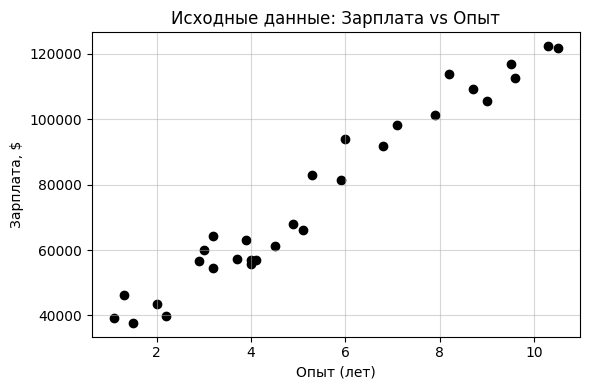

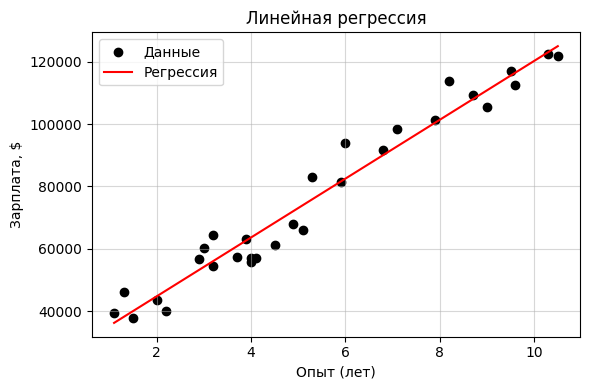

Коэффициенты: b0 = 25792.20, b1 = 9449.96
Прогноз при 5 годах опыта: $73,042.01


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
data = pd.read_csv(url)
X = data[['YearsExperience']].values
y = data['Salary'].values

model = LinearRegression()
model.fit(X, y)


plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='black')
plt.title('Исходные данные: Зарплата vs Опыт')
plt.xlabel('Опыт (лет)'); plt.ylabel('Зарплата, $')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='black', label='Данные')
# полосочка
plt.plot(X, model.predict(X), color='red', label='Регрессия')

plt.title('Линейная регрессия')
plt.xlabel('Опыт (лет)'); plt.ylabel('Зарплата, $')
plt.legend(); plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

print(f"Коэффициенты: b0 = {model.intercept_:.2f}, b1 = {model.coef_[0]:.2f}")
print(f"Прогноз при 5 годах опыта: ${model.predict([[5]])[0]:,.2f}")

# 1.3.2 — Задание

Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов.  

Варианты данных:  

    Потребление газа в 48 штатах США:
    petrol_consumption.csv
      
    Качество красного вина:
    winequality-red.csv

Найдите коэффициенты множественной регрессии. Постройте прогноз.

In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Используем petrol_consumption.csv
url = "https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv"
df = pd.read_csv(url)
X = df.drop('Petrol_Consumption', axis=1)
y = df['Petrol_Consumption']

model = LinearRegression()
model.fit(X, y)

print("Коэффициенты множественной регрессии:")
print(f"b0 (intercept) = {model.intercept_:.4f}")
for i, col in enumerate(X.columns):
    print(f"{col} = {model.coef_[i]:.4f}")

# Прогноз для первой строки
pred = model.predict([X.iloc[0]])[0]
true = y.iloc[0]
print(f"\nПрогноз для первого штата: {pred:.2f} (факт: {true})")
# Для множественной регрессии график не строится (много измерений)

Коэффициенты множественной регрессии:
b0 (intercept) = 377.2911
Petrol_tax = -34.7901
Average_income = -0.0666
Paved_Highways = -0.0024
Population_Driver_licence(%) = 1336.4494

Прогноз для первого штата: 523.23 (факт: 541)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Задание* (экспериментальное)

Экспериментально получены N значений величины Y при различных значениях величины X.
Постройте полиномы первой и второй степени, аппроксимирующие результаты эксперимента, с применением метода наименьших квадратов.
Результаты выведите в виде таблиц значений и графиков полученных полиномов.


x_exp = np.array([3.0, 3.2, 3.4, 3.6, 3.8, 4.0])
y_exp = np.array([2.0, 3.0, 3.0, 3.0, 2.0, 4.0])

Таблица аппроксимированных значений (Вариант 3):
      x  y (1-я степень)  y (2-я степень)
0   3.0            2.333            2.393
1   3.1            2.433            2.453
2   3.2            2.533            2.521
3   3.3            2.633            2.599
4   3.4            2.733            2.686
5   3.5            2.833            2.781
6   3.6            2.933            2.886
7   3.7            3.033            2.999
8   3.8            3.133            3.121
9   3.9            3.233            3.253
10  4.0            3.333            3.393


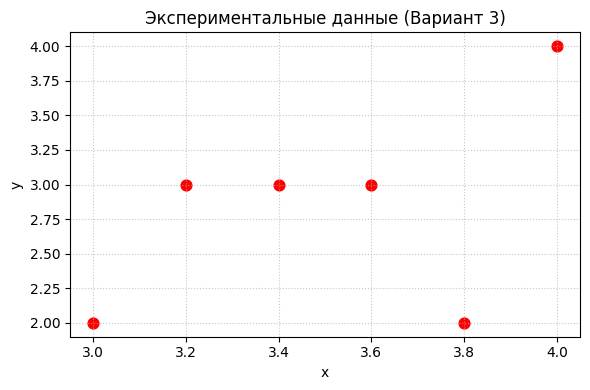

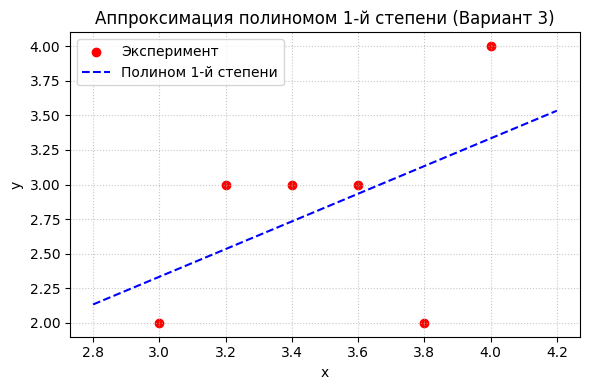

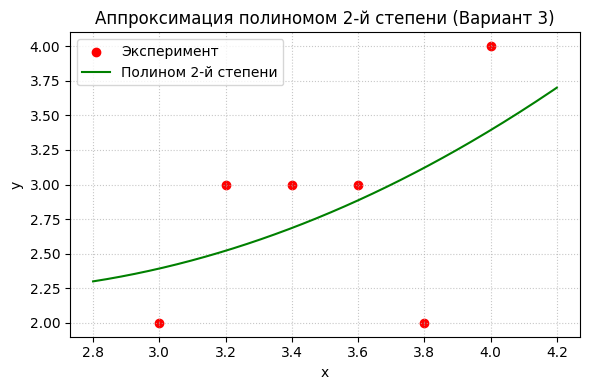


Коэффициенты полинома 1-й степени (y = b0 + b1*x):
  b1 (наклон) = 1.0000
  b0 (сдвиг)  = -0.6667

Коэффициенты полинома 2-й степени (y = b0 + b1*x + b2*x^2):
  b2 = 0.4464
  b1 = -2.1250
  b0 = 4.7500


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# === Экспериментальные данные (Вариант 3) ===
x_exp = np.array([3.0, 3.2, 3.4, 3.6, 3.8, 4.0])
y_exp = np.array([2.0, 3.0, 3.0, 3.0, 2.0, 4.0])

# === Аппроксимация полиномами 1-й и 2-й степени (метод наименьших квадратов) ===
p1 = np.poly1d(np.polyfit(x_exp, y_exp, 1))  # линейная
p2 = np.poly1d(np.polyfit(x_exp, y_exp, 2))  # квадратичная

# === Таблица значений (с шагом 0.1 в диапазоне от 3.0 до 4.0) ===
x_table = np.arange(3.0, 4.01, 0.1)
table = pd.DataFrame({
    'x': x_table,
    'y (1-я степень)': p1(x_table),
    'y (2-я степень)': p2(x_table)
})

print("Таблица аппроксимированных значений (Вариант 3):")
print(table.round(3))

# === Графики (каждый — отдельно, как в примерах тетради) ===

# Исходные данные
plt.figure(figsize=(6, 4))
plt.scatter(x_exp, y_exp, color='red', s=60)
plt.title('Экспериментальные данные (Вариант 3)')
plt.xlabel('x'); plt.ylabel('y')
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

# Полином 1-й степени
x_plot = np.linspace(2.8, 4.2, 200)
plt.figure(figsize=(6, 4))
plt.scatter(x_exp, y_exp, color='red', label='Эксперимент')
plt.plot(x_plot, p1(x_plot), '--', color='blue', label='Полином 1-й степени')
plt.title('Аппроксимация полиномом 1-й степени (Вариант 3)')
plt.xlabel('x'); plt.ylabel('y')
plt.legend(); plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

# Полином 2-й степени
plt.figure(figsize=(6, 4))
plt.scatter(x_exp, y_exp, color='red', label='Эксперимент')
plt.plot(x_plot, p2(x_plot), '-', color='green', label='Полином 2-й степени')
plt.title('Аппроксимация полиномом 2-й степени (Вариант 3)')
plt.xlabel('x'); plt.ylabel('y')
plt.legend(); plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

# === Вывод коэффициентов ===
print("\nКоэффициенты полинома 1-й степени (y = b0 + b1*x):")
print(f"  b1 (наклон) = {p1.coefficients[0]:.4f}")
print(f"  b0 (сдвиг)  = {p1.coefficients[1]:.4f}")

print("\nКоэффициенты полинома 2-й степени (y = b0 + b1*x + b2*x^2):")
print(f"  b2 = {p2.coefficients[0]:.4f}")
print(f"  b1 = {p2.coefficients[1]:.4f}")
print(f"  b0 = {p2.coefficients[2]:.4f}")